# Arup University - Machine Learning & Artificial Intelligence
***
https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed
### 2019 - 2020 Individual assignment
# Road Traffic Accidents

# Spatial Join of accidents to road links

Data sorce:  
 - Road network: https://www.ordnancesurvey.co.uk/opendatadownload/products.html
 


<br>

__Gabor Jenei__
***

In [1]:
#Imports
from time import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets.samples_generator import make_regression
from sklearn.ensemble.forest import RandomForestRegressor
from sklearn.linear_model.ridge import Ridge
from sklearn.linear_model.stochastic_gradient import SGDRegressor
from sklearn.svm.classes import SVR
from sklearn.utils import shuffle
#from sklearn import linear_model

import seaborn as sns

south_west_penisula_higway = ['E06000028', 'E06000029', 'E10000009','E10000027', 'E06000026', 'E06000027', 'E10000008', 'E06000052']
south_west_penisula_localauth = [496, 580, 581, 582, 583, 584, 585, 586,587,588,589, 596,605,606,607,608,609,610,635,640,641,642,643,644,645,646,647]

In [ ]:
######### Read up accidents
accidents_2018 = pd.read_csv(r"http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafetyData_Accidents_2018.csv",low_memory=False)
# accidents_2017 = pd.read_csv(r"http://data.dft.gov.uk.s3.amazonaws.com/road-accidents-safety-data/dftRoadSafetyData_Accidents_2017.zip",low_memory=False, compression='zip')
# accidents_2016 = pd.read_csv(r"http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafety_Accidents_2016.zip",low_memory=False, compression='zip')
# accidents_2015 = pd.read_csv(r"http://data.dft.gov.uk/road-accidents-safety-data/RoadSafetyData_Accidents_2015.zip",low_memory=False, compression='zip')
# accidents_2014 = pd.read_csv(r"http://data.dft.gov.uk/road-accidents-safety-data/DfTRoadSafety_Accidents_2014.zip",low_memory=False)

######### Read up casualties
casualties_2018 = pd.read_csv(r"http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafetyData_Casualties_2018.csv",low_memory=False)
# casualties_2017 = pd.read_csv(r"http://data.dft.gov.uk.s3.amazonaws.com/road-accidents-safety-data/dftRoadSafetyData_Casualties_2017.zip",low_memory=False, compression='zip')
# casualties_2016 = pd.read_csv(r"http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafetyData_Casualties_2016.zip",low_memory=False, compression='zip')
# casualties_2015 = pd.read_csv(r"http://data.dft.gov.uk/road-accidents-safety-data/RoadSafetyData_Casualties_2015.zip",low_memory=False, compression='zip')
# casualties_2014 = pd.read_csv(r"http://data.dft.gov.uk/road-accidents-safety-data/DfTRoadSafety_Casualties_2014.zip",low_memory=False, compression='zip')

######### Read up vehicles
vehicles_2018 = pd.read_csv(r"http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafetyData_Vehicles_2018.csv",low_memory=False)
# vehicles_2017 = pd.read_csv(r"http://data.dft.gov.uk.s3.amazonaws.com/road-accidents-safety-data/dftRoadSafetyData_Vehicles_2017.zip",low_memory=False, compression='zip')
# vehicles_2016 = pd.read_csv(r"http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafetyData_Vehicles_2016.zip",low_memory=False, compression='zip')
# vehicles_2015 = pd.read_csv(r"http://data.dft.gov.uk/road-accidents-safety-data/RoadSafetyData_Vehicles_2015.zip",low_memory=False, compression='zip')
# vehicles_2014 = pd.read_csv(r"http://data.dft.gov.uk/road-accidents-safety-data/DfTRoadSafety_Vehicles_2014.zip",low_memory=False, compression='zip')

# df_accidents = accidents_2018.append([accidents_2017, accidents_2016, accidents_2015, accidents_2014], sort=False)
# df_vehicles = vehicles_2018.append([vehicles_2017, vehicles_2016, vehicles_2015, vehicles_2014], sort=False)
# df_casualties = casualties_2018.append([casualties_2017, casualties_2016, casualties_2015, casualties_2014], sort=False)

In [2]:
# df_accidents.to_csv(r"C:\Projects\0_Training\AU_MLAI\IndividualProject\data\df_accidents.csv")
# df_casualties.to_csv(r"C:\Projects\0_Training\AU_MLAI\IndividualProject\data\df_casualties.csv")
# df_vehicles.to_csv(r"C:\Projects\0_Training\AU_MLAI\IndividualProject\data\df_vehicles.csv")

df_accidents = pd.read_csv(r"C:\Projects\0_Training\AU_MLAI\IndividualProject\data\df_accidents.csv")
df_casualties= pd.read_csv(r"C:\Projects\0_Training\AU_MLAI\IndividualProject\data\df_casualties.csv")
df_vehicles= pd.read_csv(r"C:\Projects\0_Training\AU_MLAI\IndividualProject\data\df_vehicles.csv")


C:\Users\Gabor.Jenei\AppData\Roaming\Python\Python36\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (1,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Gabor.Jenei\AppData\Roaming\Python\Python36\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Read up ITN layer

import glob, os
# os.chdir(r"H:\ArupUni\3_IndividualProject\data\oproad_essh_gb\data")
os.chdir(r"C:\Projects\0_Training\AU_MLAI\IndividualProject\data\oproad_essh_gb\data")

gridref = ['HP','HT','HU','HZ','NA','NB','NC','ND','NF','NG','NH','NJ','NK','NL','NM','NN','NO','NR','NS','NT',
           'NU','NW','NX','NY','NZ','SD','SE','SH','SJ','SK','SM','SN','SO','SP','SR','SS','ST','SU','SV','SW',
           'SX','SY','SZ','TA','TF','TG','TL','TM','TQ','TR','TV']

gridref_swp = ['SO','SP','SR','SS','ST','SU','SV','SW',
           'SX','SY','SZ']



itn_link_layer_swp = gpd.GeoDataFrame()

for grid in gridref_swp:
    itn_link_layer_swp = itn_link_layer_swp.append(gpd.read_file(grid+'_RoadLink.shp'), sort=False)

# This reads up all the shp files
# for file in glob.glob("*.shp"):
#    itn_link_layer = itn_link_layer.append(gpd.read_file(file), sort=False)

In [ ]:
#itn_link_layer.to_file(r"C:\Projects\0_Training\AU_MLAI\IndividualProject\data\oproad_essh_gb\GB_RoadLink.shp", driver='ESRI Shapefile', schema=None)

In [ ]:
#itn_link_layer = gpd.GeoDataFrame.from_file(r"C:\Projects\0_Training\AU_MLAI\IndividualProject\data\oproad_essh_gb\GB_RoadLink.shp", driver='ESRI Shapefile', schema=None)

In [ ]:
# Calculate Angle to North

# itn_link_layer.geometry.head()
# itn_link_layer_test = itn_link_layer[:100]
# itn_link_layer_test["geometry"][:2]

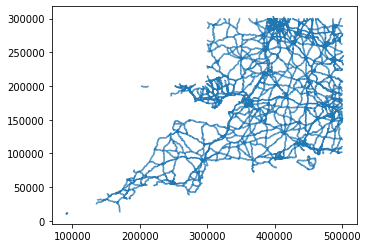

In [5]:
itn_link_layer_swp.head()
itn_link_layer_swp["class"].unique()
itn_link_layer_swp[itn_link_layer_swp["class"].isin(['Motorway', 'A Road'])].plot()

In [7]:
itn_link_layer_swp.total_bounds

array([ 87441.91,   8045.93, 502152.15, 303401.72])

In [10]:
## attach points to links

accident_nodes = gpd.GeoDataFrame(df_accidents, geometry=gpd.points_from_xy(df_accidents["Location_Easting_OSGR"],
                                                              df_accidents["Location_Northing_OSGR"]))


accident_nodes_swp = accident_nodes[accident_nodes["Local_Authority_(District)"].isin(south_west_penisula_localauth)]
# accident_nodes_swp_hw = accident_nodes_swp[accident_nodes_swp["1st_Road_Class"].isin([1,2,3])]

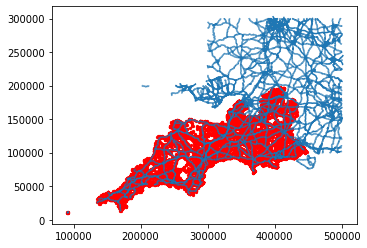

In [11]:
base = itn_link_layer_swp[itn_link_layer_swp["class"].isin(['Motorway', 'A Road'])].plot()
accident_nodes_swp.plot(ax=base, marker='o', color='red', markersize=5);

In [12]:
# 1:Motorway, 2:A(M), 3:A, 4:B, 5:C, 6:Unclassified


accident_nodes["1st road cat Str"] =accident_nodes["1st_Road_Class"].map({1:'M', 2:'A(M)', 3:'A', 4:'B', 5:'C', 6:'Unclassified'})
accident_nodes["2nd road cat Str"] =accident_nodes["2nd_Road_Class"].map({1:'M', 2:'A(M)', 3:'A', 4:'B', 5:'C', 6:'Unclassified'})

accident_nodes["1st roadNumber"] = accident_nodes["1st road cat Str"] + accident_nodes["1st_Road_Number"].map(str)
accident_nodes["2nd roadNumber"] = accident_nodes["2nd road cat Str"] + accident_nodes["2nd_Road_Number"].map(str)

accident_nodes.loc[accident_nodes["1st road cat Str"] == 'A(M)', "1st roadNumber"] = "A" + accident_nodes["1st_Road_Number"].map(str) + "(M)"
accident_nodes.loc[accident_nodes["2nd road cat Str"] == 'A(M)', "2nd roadNumber"] = "A" + accident_nodes["2nd_Road_Number"].map(str) + "(M)"


itn_link_layer_swp.loc[itn_link_layer_swp['roadNumber'].isnull(), 'roadNumber'] = "Unclassified0"                                            

In [13]:
accident_nodes_swp = gpd.GeoDataFrame(accident_nodes[(accident_nodes["Local_Authority_(District)"].isin(south_west_penisula_localauth))])
#accident_nodes_swp.drop(columns="Unnamed: 0", inplace=True)

In [19]:
accident_nodes_swp.head().transpose()

,86634,86642,86648,86653,86656
Unnamed: 0,86634,86642,86648,86653,86656
Accident_Index,2018440000162,2018440001994,2018440002357,2018440002922,2018440003409
Location_Easting_OSGR,437648,415401,420223,429172,432765
Location_Northing_OSGR,110235,116331,95042,93035,109870
Longitude,-1.46611,-1.78214,-1.71467,-1.58797,-1.53556
Latitude,50.8904,50.9462,50.7546,50.7362,50.8874
Police_Force,44,44,44,44,44
Accident_Severity,3,3,2,3,2
Number_of_Vehicles,2,3,1,1,2
Number_of_Casualties,1,1,1,1,2


In [20]:
#accident_nodes_swp_hw
#accident_nodes["1st road Closest Link ID"]=''

for index in accident_nodes_swp.index:
    if accident_nodes_swp.loc[index, "1st_Road_Class"] in ([1,2,3,4]):
        if (accident_nodes_swp.loc[index, "1st roadNumber"] in itn_link_layer_swp['roadNumber']):
            itn_link_layer_this_road = gpd.GeoDataFrame(itn_link_layer_swp[itn_link_layer_swp['roadNumber'] == accident_nodes_swp.loc[index, "1st roadNumber"]])
        else:
            itn_link_layer_this_road = itn_link_layer_swp
        
        itn_link_layer_this_road["Distance"]=itn_link_layer_this_road.distance(accident_nodes_swp.loc[index].geometry)
        min_dist = itn_link_layer_this_road["Distance"].min()
        closest_link = itn_link_layer_this_road[itn_link_layer_this_road["Distance"] == min_dist]["identifier"]
        
        accident_nodes_swp.loc[index, "1st road Closest Link ID"] = closest_link.values[0]
        accident_nodes_swp.loc[index, "1st road Closest Link Distance"] = min_dist
    
    if accident_nodes_swp.loc[index, "2nd_Road_Class"] in ([1,2,3,4]):
        if (type(accident_nodes_swp.loc[index, "2nd roadNumber"]) == str):
            if accident_nodes_swp.loc[index, "2nd roadNumber"] in itn_link_layer_swp['roadNumber']:
                itn_link_layer_this_road = gpd.GeoDataFrame(itn_link_layer_swp[itn_link_layer_swp['roadNumber'] == accident_nodes_swp.loc[index, "2nd roadNumber"]])
            else:
                itn_link_layer_this_road = itn_link_layer_swp

            itn_link_layer_this_road["Distance"]=itn_link_layer_this_road.distance(accident_nodes_swp.loc[index].geometry)
            min_dist = itn_link_layer_this_road["Distance"].min()
            closest_link = itn_link_layer_this_road[itn_link_layer_this_road["Distance"] == min_dist]["identifier"]
            accident_nodes_swp.loc[index, "2nd road Closest Link ID"] = closest_link.values[0]
            accident_nodes_swp.loc[index, "2nd road Closest Link Distance"] = min_dist

        

KeyboardInterrupt: 

In [21]:
accident_nodes_swp.loc[:index].count()

Unnamed: 0                                     1884
Accident_Index                                 1884
Location_Easting_OSGR                          1883
Location_Northing_OSGR                         1883
Longitude                                      1883
Latitude                                       1883
Police_Force                                   1884
Accident_Severity                              1884
Number_of_Vehicles                             1884
Number_of_Casualties                           1884
Date                                           1884
Day_of_Week                                    1884
Time                                           1884
Local_Authority_(District)                     1884
Local_Authority_(Highway)                      1884
1st_Road_Class                                 1884
1st_Road_Number                                1884
Road_Type                                      1884
Speed_limit                                    1884
Junction_Det